In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('airline-passenger-traffic.csv', header = None)

In [3]:
df.head()

,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
df.columns = ['Months', 'Passengers']

In [5]:
df

,Months,Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Months      144 non-null    object 
 1   Passengers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [7]:
df['Months'] = pd.to_datetime(df['Months'], format = '%Y-%m')

In [8]:
df

,Months,Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
...,...,...
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0
142,1960-11-01,390.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Months      144 non-null    datetime64[ns]
 1   Passengers  140 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [10]:
df = df.set_index('Months')

In [11]:
df

,Passengers
Months,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0
...,...
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0


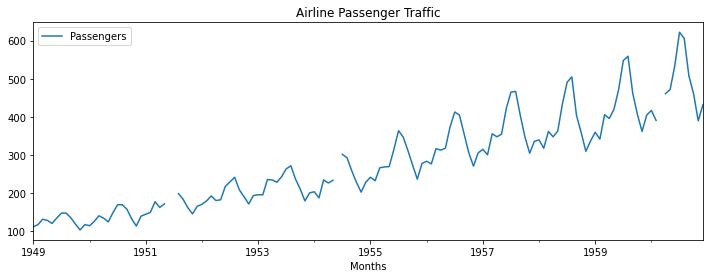

In [12]:
df.plot(figsize=(12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic')
plt.show()

## Time Series - Data Cleaning

### Impute the Missing Values

In [13]:
# Linear Inter Polation
df['Passengers'] = df['Passengers'].interpolate(method = 'linear')

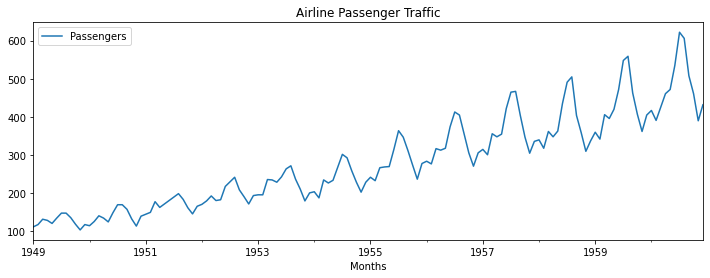

In [14]:
##  Linear Interpolation
df.plot(figsize = (12,4))
plt.legend(loc = 'best')
plt.title('Airline Passenger Traffic')
plt.show()

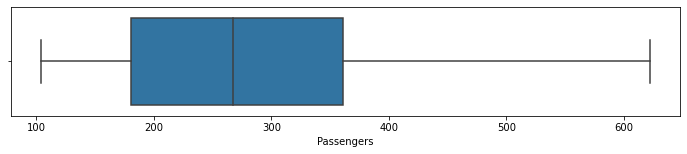

In [15]:
# detect outliers

fig = plt.subplots(figsize = (12,2))
ax = sns.boxplot(x = df['Passengers'], whis = 1.5)

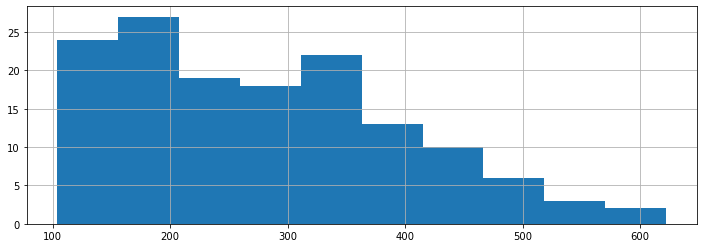

In [16]:
fig = df['Passengers'].hist(figsize = (12,4))

## Treating outlers

- Visulation if outliers are present in the time series

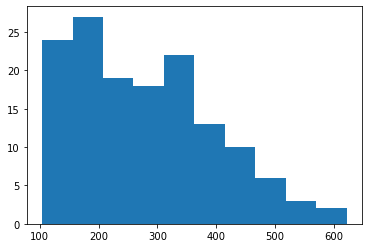

In [17]:
plt.hist(df['Passengers'])
plt.show()

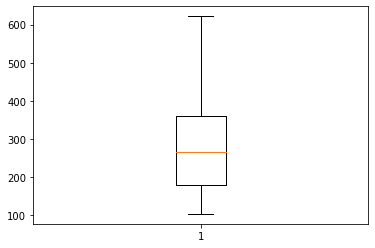

In [18]:
plt.boxplot(df['Passengers'])
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


## Decomposition of Time series

In [20]:
import statsmodels.api as sn

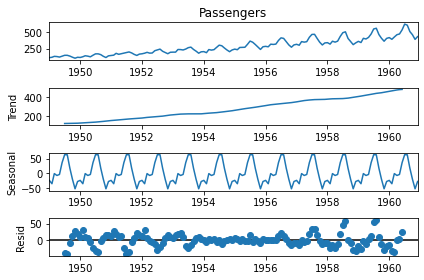

In [21]:
decompostion = sn.tsa.seasonal_decompose(df['Passengers'], model = 'additive')
fig = decompostion.plot()
plt.show()

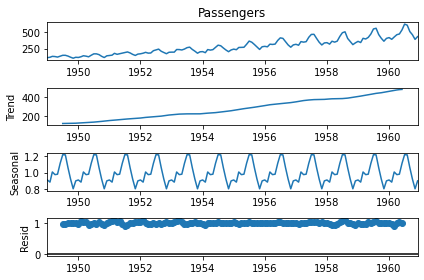

In [22]:
decompostion = sn.tsa.seasonal_decompose(df['Passengers'], model = 'multiplicative')
fig = decompostion.plot()
plt.show()

# AR Model

In [23]:
from statsmodels.tsa.stattools import kpss, adfuller

In [24]:
kpss_test = kpss(df['Passengers'])

C:\Anaconda\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [25]:
kpss_test

(1.6511897469421617,
 0.01,
 8,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [26]:
print('KPSS Statastic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' %  kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statastic: 1.651190
Critical Values @ 0.05: 0.46
p-value: 0.010000


### Observation of KPSS test:


- As p-value, 0.01 < 0.05 thus, we reject null hypothesis
- Thus the series is not stationary
- As series is not stationary, we will try to make the series stationary.

### Making the series stationary

In [27]:
from scipy.stats import boxcox   # Box Cox transformation to make variance constant --> as series is multiplicative

In [28]:
# boxcox transformation
df['boxcox'] = boxcox(df['Passengers'], lmbda = 0)

In [29]:
df.head()

,Passengers,boxcox
Months,,
1949-01-01,112.0,4.718499
1949-02-01,118.0,4.770685
1949-03-01,132.0,4.882802
1949-04-01,129.0,4.859812
1949-05-01,121.0,4.795791


In [30]:
# checking for stationary on transformed series
adf_test = adfuller(df['boxcox'])

In [31]:
print('p-value: %f' % adf_test[1])

p-value: 0.428029


## Obeservation of ADF test transformation using BoxCox:

- As p-value 0.42 > 0.05 we can not reject null hypothesis
- Thus the series is not stationary

### Differencing

In [32]:
df['boxcox_diff'] = df['boxcox'] - df['boxcox'].shift()

In [33]:
df.head()

,Passengers,boxcox,boxcox_diff
Months,,,
1949-01-01,112.0,4.718499,NaN
1949-02-01,118.0,4.770685,0.052186
1949-03-01,132.0,4.882802,0.112117
1949-04-01,129.0,4.859812,-0.022990
1949-05-01,121.0,4.795791,-0.064022


In [34]:
# droping the null values
df.dropna(inplace = True)

In [35]:
df.head()

,Passengers,boxcox,boxcox_diff
Months,,,
1949-02-01,118.0,4.770685,0.052186
1949-03-01,132.0,4.882802,0.112117
1949-04-01,129.0,4.859812,-0.022990
1949-05-01,121.0,4.795791,-0.064022
1949-06-01,135.0,4.905275,0.109484


In [36]:
# checking for stationary on transformed and differenced series

adf_test = adfuller(df['boxcox_diff'])

In [37]:
print('p-value: %f' % adf_test[1])

p-value: 0.015326


### Observation of ADF test after transformation using boxcox:

- As p-value 0.0153 < 0.05 we fail to reject null hypothesis
- Thus now the series is stationay.

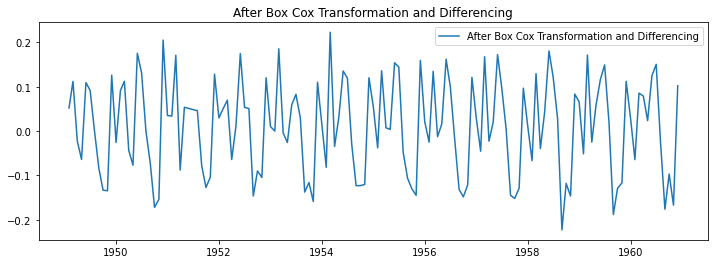

In [38]:
plt.figure(figsize=(12,4))
plt.plot(df['boxcox_diff'], label = 'After Box Cox Transformation and Differencing')
plt.legend(loc = 'best')
plt.title('After Box Cox Transformation and Differencing')
plt.show()

### Conclusion:

- As series is now stationary we can use AR model on it.

## Autocorrelation Function(ACF)

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 864x288 with 0 Axes>

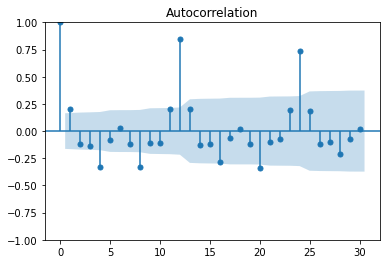

In [40]:
plt.figure(figsize=(12,4))
plot_acf(df['boxcox_diff'], lags = 30)
plt.show()

C:\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 864x288 with 0 Axes>

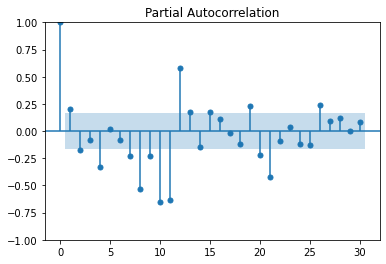

In [41]:
plt.figure(figsize=(12,4))
plot_pacf(df['boxcox_diff'], lags = 30)
plt.show()

In [42]:
train_len = 120

In [43]:
train = df['boxcox_diff'][:train_len]
test = df['boxcox_diff'][train_len:]

In [44]:
train

Months
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1958-09-01   -0.223144
1958-10-01   -0.118092
1958-11-01   -0.146750
1958-12-01    0.083511
1959-01-01    0.066021
Name: boxcox_diff, Length: 120, dtype: float64

In [45]:
test.index.min()

Timestamp('1959-02-01 00:00:00')

In [46]:
test.index.max()

Timestamp('1960-12-01 00:00:00')

## AR (Simple)

In [47]:
from statsmodels.tsa.arima.model import ARIMA

In [48]:
model = ARIMA(train, order=(1, 0 , 0))

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [49]:
model = model.fit()

In [50]:
print(model.params)

const     0.009918
ar.L1     0.185527
sigma2    0.010606
dtype: float64


In [51]:
y_pred = model.predict(test.index.min(),test.index.max())

In [52]:
y_pred

1959-02-01    0.020327
1959-03-01    0.011849
1959-04-01    0.010276
1959-05-01    0.009985
1959-06-01    0.009930
1959-07-01    0.009920
1959-08-01    0.009919
1959-09-01    0.009918
1959-10-01    0.009918
1959-11-01    0.009918
1959-12-01    0.009918
1960-01-01    0.009918
1960-02-01    0.009918
1960-03-01    0.009918
1960-04-01    0.009918
1960-05-01    0.009918
1960-06-01    0.009918
1960-07-01    0.009918
1960-08-01    0.009918
1960-09-01    0.009918
1960-10-01    0.009918
1960-11-01    0.009918
1960-12-01    0.009918
Freq: MS, Name: predicted_mean, dtype: float64

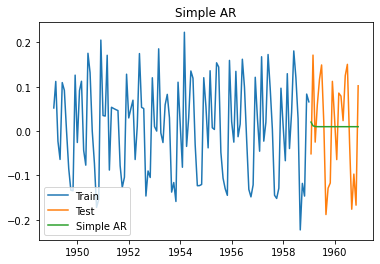

In [53]:
plt.plot(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_pred,label='Simple AR')
plt.legend(loc = 'best')
plt.title('Simple AR')
plt.show()


In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
rmse = np.sqrt(mean_squared_error(test,y_pred)).round(2)

In [56]:
rmse

0.11

In [57]:
mape = np.round(np.mean(np.abs(test -y_pred)/test)*100,2)

In [58]:
mape

-4.33

In [59]:
results = pd.DataFrame({'Method':['Simple AR'], 'RMSE': [rmse], 'MAPE': [mape]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple AR,0.11,-4.33


## MA

In [60]:
model = ARIMA(train, order=(0, 0 , 1))

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [61]:
model = model.fit()

In [62]:
print(model.params)

const     0.009816
ma.L1     0.270515
sigma2    0.010433
dtype: float64


In [63]:
y_pred = model.predict(test.index.min(),test.index.max())

In [64]:
y_pred

1959-02-01    0.016876
1959-03-01    0.009816
1959-04-01    0.009816
1959-05-01    0.009816
1959-06-01    0.009816
1959-07-01    0.009816
1959-08-01    0.009816
1959-09-01    0.009816
1959-10-01    0.009816
1959-11-01    0.009816
1959-12-01    0.009816
1960-01-01    0.009816
1960-02-01    0.009816
1960-03-01    0.009816
1960-04-01    0.009816
1960-05-01    0.009816
1960-06-01    0.009816
1960-07-01    0.009816
1960-08-01    0.009816
1960-09-01    0.009816
1960-10-01    0.009816
1960-11-01    0.009816
1960-12-01    0.009816
Freq: MS, Name: predicted_mean, dtype: float64

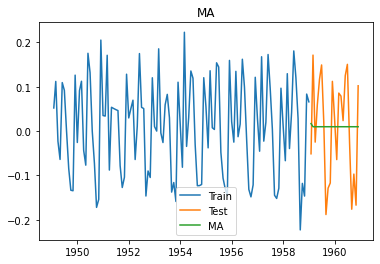

In [65]:
plt.plot(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_pred,label='MA')
plt.legend(loc = 'best')
plt.title('MA')
plt.show()

In [66]:
rmse = np.sqrt(mean_squared_error(test,y_pred)).round(2)

In [67]:
rmse

0.11

In [68]:
mape = np.round(np.mean(np.abs(test -y_pred)/test)*100,2)

In [69]:
mape

-3.76

In [70]:
Result2 = pd.DataFrame({'Method':['MA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, Result2])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple AR,0.11,-4.33
0,MA,0.11,-3.76


 ## ARMA

In [71]:
model = ARIMA(train, order=(1, 0 , 1))

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [72]:
model = model.fit()

In [73]:
print(model.params)

const     0.009576
ar.L1    -0.527566
ma.L1     0.798209
sigma2    0.009967
dtype: float64


In [74]:
y_pred = model.predict(test.index.min(),test.index.max())

In [75]:
y_pred

1959-02-01   -0.023408
1959-03-01    0.026978
1959-04-01    0.000396
1959-05-01    0.014420
1959-06-01    0.007021
1959-07-01    0.010924
1959-08-01    0.008865
1959-09-01    0.009952
1959-10-01    0.009378
1959-11-01    0.009681
1959-12-01    0.009521
1960-01-01    0.009605
1960-02-01    0.009561
1960-03-01    0.009585
1960-04-01    0.009572
1960-05-01    0.009579
1960-06-01    0.009575
1960-07-01    0.009577
1960-08-01    0.009576
1960-09-01    0.009577
1960-10-01    0.009576
1960-11-01    0.009576
1960-12-01    0.009576
Freq: MS, Name: predicted_mean, dtype: float64

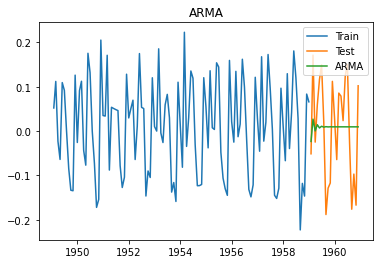

In [76]:
plt.plot(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_pred,label='ARMA')
plt.legend(loc = 'best')
plt.title('ARMA')
plt.show()


In [77]:
rmse = np.sqrt(mean_squared_error(test,y_pred)).round(2)

In [78]:
rmse

0.11

In [79]:
mape = np.round(np.mean(np.abs(test -y_pred)/test)*100,2)

In [80]:
mape

1.03

In [81]:
Result3 = pd.DataFrame({'Method':['ARMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, Result3])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple AR,0.11,-4.33
0,MA,0.11,-3.76
0,ARMA,0.11,1.03


 ## ARIMA

In [82]:
model = ARIMA(train, order=(1, 1 , 1))

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
model = model.fit()

In [84]:
print(model.params)

ar.L1     0.195308
ma.L1    -0.999913
sigma2    0.010698
dtype: float64


In [85]:
y_pred = model.predict(test.index.min(),test.index.max())

In [86]:
y_pred

1959-02-01    0.020884
1959-03-01    0.012069
1959-04-01    0.010347
1959-05-01    0.010011
1959-06-01    0.009945
1959-07-01    0.009932
1959-08-01    0.009930
1959-09-01    0.009929
1959-10-01    0.009929
1959-11-01    0.009929
1959-12-01    0.009929
1960-01-01    0.009929
1960-02-01    0.009929
1960-03-01    0.009929
1960-04-01    0.009929
1960-05-01    0.009929
1960-06-01    0.009929
1960-07-01    0.009929
1960-08-01    0.009929
1960-09-01    0.009929
1960-10-01    0.009929
1960-11-01    0.009929
1960-12-01    0.009929
Freq: MS, Name: predicted_mean, dtype: float64

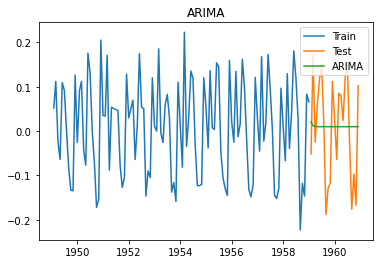

In [87]:
plt.plot(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_pred,label='ARIMA')
plt.legend(loc = 'best')
plt.title('ARIMA')
plt.show()

In [88]:
rmse = np.sqrt(mean_squared_error(test,y_pred)).round(2)

In [89]:
rmse

0.11

In [90]:
mape = np.round(np.mean(np.abs(test -y_pred)/test)*100,2)

In [91]:
mape

-4.41

In [92]:
Result4 = pd.DataFrame({'Method':['ARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, Result4])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple AR,0.11,-4.33
0,MA,0.11,-3.76
0,ARMA,0.11,1.03
0,ARIMA,0.11,-4.41


## SARIMA

In [93]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [94]:
model = SARIMAX(train, order = (1, 1, 1), seasonal_order=(1, 1, 1, 12))

C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [95]:
model = model.fit()

C:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
print(model.params)

ar.L1      -0.252333
ma.L1      -0.990208
ar.S.L12   -0.067463
ma.S.L12   -0.490809
sigma2      0.001475
dtype: float64


In [97]:
y_pred = model.predict(test.index.min(),test.index.max())

In [98]:
y_pred

1959-02-01   -0.063186
1959-03-01    0.147135
1959-04-01   -0.029262
1959-05-01    0.026466
1959-06-01    0.168800
1959-07-01    0.110135
1959-08-01    0.006579
1959-09-01   -0.174782
1959-10-01   -0.134032
1959-11-01   -0.137999
1959-12-01    0.099159
1960-01-01    0.039250
1960-02-01   -0.058327
1960-03-01    0.143939
1960-04-01   -0.030164
1960-05-01    0.026859
1960-06-01    0.169065
1960-07-01    0.110292
1960-08-01    0.007455
1960-09-01   -0.178622
1960-10-01   -0.133534
1960-11-01   -0.139167
1960-12-01    0.097526
Freq: MS, Name: predicted_mean, dtype: float64

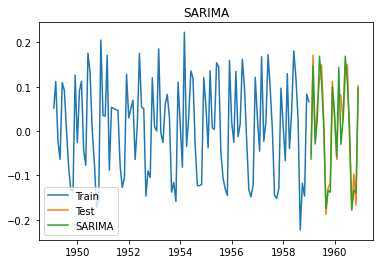

In [99]:
plt.plot(figsize=(12,4))
plt.plot(train,label='Train')
plt.plot(test,label='Test')
plt.plot(y_pred,label='SARIMA')
plt.legend(loc = 'best')
plt.title('SARIMA')
plt.show()

In [100]:
rmse = np.sqrt(mean_squared_error(test,y_pred)).round(2)

In [101]:
rmse

0.04

In [102]:
mape = np.round(np.mean(np.abs(test -y_pred)/test)*100,2)

In [103]:
mape

12.01

In [104]:
Result5 = pd.DataFrame({'Method':['SARIMA'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, Result5])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple AR,0.11,-4.33
0,MA,0.11,-3.76
0,ARMA,0.11,1.03
0,ARIMA,0.11,-4.41
0,SARIMA,0.04,12.01
